# Факторы успешности компьютерных игр

#### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Данные
Исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) за 2016 год. Данные за 2016 год могут быть неполными.

#### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Задача
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описать полученные результаты и зафиксируйте основной вывод проведённого исследования.

#### Ход исследования
Данные для исследования хранятся в файте `games.csv`, о качестве данных известно мало, поэтому перед тем, как искать зависимости, необходмо провести обзор данных, оценить ошибки и их возможное влияние на исследование, а также устранить критичные ошибки данных.

Таким образом, исследование будет проводиться в 6 этапов:
1. Изучение общей информации (обзор)
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя из каждого региона
5. Проверка гипотез
6. Общий вывод

## 1. Изучение общей информации

Посмотрим, с какими данными предстоит иметь дело:

In [1]:
# перед началом работы импортируем все нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('datasets/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод по разделу

После знакомства с данными можно сделать следующие выводы:
- в целом набора данных должно хватить для выполнения задач проекта
- при этом тип данных некоторых столбцов не соответствует содержанию - это надо будет исправить
- в данных есть пропуски - нужно будет ознакомиться с ними подробнее, попытаться восстановить там, где можно и обработать те, которые не получится восстановить
- для выполнения задач анализа могут потребоваться дополнительные вычисления

Все это проделаем в следующем разделе Предобработки данных.

## 2. Предобработка данных

### 2.1 Переименование столбцов
В названиях столбцов присутствуют заглавные буквы - это не очень удобно для дальнейшей работы, приведем все наименования к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()

### 2.2 Заполнение пропусков и изменение типов данных 
Выявим пропуски в столбцах и посмотрим, можно ли их заполнить и, если да, то каким образом. Изменим тип данных в столбцах, где это нужно.

In [5]:
#Выведем процент пропусков в каждом столбце
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропуски нашлись в следующих столбцах:

- `year_of_release` - 2% строк не заполнены, можно удалить(?)
- `critic_score` - 51% строк не заполнены, мы не можем удалить половину датасета, нужно будет обработать эти строки
- `user_score` - 40% строк не заполнены, также нужно будет обработать эти пропуски
- `rating` - также не заполнены 40% строк, пропуски тоже необходимо обработать

In [6]:
games.query('year_of_release.isna()').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


В столбце `year_of_release` можно увидеть строки, для которых не известен ни год выхода игры, ни оценки критиков - восстановить эту информацию невозможно, но информация о жанре и продажах пригодится для анализа. Заполним такие пропуски значением 1900, для удобства обработки информации в таблице.

При этом есть и такие строки, как ниже - когда год выхода игры не указан для одной из платформ, на которых она продавалась. В реальной жизни бывает, что порт игр на другие платформы может занять некоторое время (а значит год выхода будет отличаться), но также часто игру выкладывают на все доступные платформы сразу. Поэтому считаю, что в таком случае, можно заполнить пропуски тем же годом, что и для других платформ.

In [7]:
# В этом примере не указан год выхода игры на Wii и PSP - считаю, что можно скопировать его с других платформ
games.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [8]:
# Согласно решению, принятому выше, скопируем год выхода игр в подобных случаях, остальные пропуски заменю на 1900

for name in games.query('year_of_release.isna()')['name'].unique():
    min_y = games.loc[games['name'] == name, 'year_of_release'].min()
    max_y = games.loc[games['name'] == name, 'year_of_release'].max()
    if min_y == max_y:
        games.loc[(games['name'] == name), 'year_of_release'] = (games
                                                                 .loc[(games['name'] == name), 'year_of_release']
                                                                 .fillna(min_y)
                                                                )
    else:
        games.loc[(games['name'] == name), 'year_of_release'] = (games
                                                                 .loc[(games['name'] == name), 'year_of_release']
                                                                 .fillna(1900)
                                                                )

Избавившись от `NaN` - можем преобразовать год выхода игр к целому типу, что более адекватно содержимому столбца.

In [9]:
games['year_of_release'] = games['year_of_release'].astype(int)

В столбце `critic_score` не заполнено 51% значений. Возможно, какие-то из игр просто не были оценены критиками и/или пользователями, или таких оценок слишком мало, чтобы вывести среднее. Это объяснимо для непопулярных или старых игр. При этом у нас есть случаи, когда популярные игры остались без оценки (например, серия Pokemon, оценки которой, очевидно, существуют и из легко найти). 

Восстановить эти данные для половины датасета вручную не получится - это займет слишком много времени, тем более, что мы не имеем информации о том, по какой версии (какого журнала, сайта и тд) дается оценка. Поэтому считаю целесообразным заполнить пропуски числовым значением, сильно отличающимся от остальных (выбрано 999) - это позволит привести тип данных столбца к целому и его легко будет отфильтровать при анализе.

In [10]:
games.query('critic_score.isna()').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [11]:
# заполняем пропуски в столбце 'critic_score' значением 999, затем приводим к целочисленному типу
games['critic_score'] = games['critic_score'].fillna(999).astype(int)

Ситуация для столбца `user_score` похожая, но с одним очевидным различием: значением `tbd` - *to be discussed (подлежит уточнению)*. Это означает, что оценка еще не выставлена пользователями, но может появиться в скором времени. Пока не будем удалять это значение и рассмотрим, в каких строках оно встречается, возможно, удастся получить какую-то информацию.

Поэтому, придется принять это значение за пропуск и обработать таким же образом - заменю их значение на выделяющееся числовое значение 99.9.

In [12]:
# заполняем обычные пропуски
games['user_score'] = games['user_score'].fillna(99.9)


# обрабатываем строки с tbd
games['user_score'] = (games['user_score']
                       .where(games['user_score'] != 'tbd', 99.9)
                      )

games['user_score'] = games['user_score'].astype(float)

Пропуски в столбце `rating` тоже не получится восстановить, оставим их как есть.
Однако посмотрим, что содержится в этом столбце:

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Все наименования рейтингов адекватны ESRB, никаких неподходящих значений не обнаружено, но несколько замечаний.

Для удобства воспирятия информации при дальнейшем анализе, заполним пропуски, обозначив их `Undefined` - не определен.

Категории E ("Everyone") и K-A ("Kids to Adults") - это одно и то же, различие может означать разницу в дате выхода игры (K-A - старое обозначение, использовалось до 1997 года). Посмотрим, на количество записей с дублирующими рейтингами, чтобы понять, как с ними поступить.

RP ("Rating Pending") - не рейтинг, а тоже своего рода пропуск: это означает, что рейтинг ожидает подтверждения. Такой рейтинг может быть только на демо-версиях игр до поступления в продажу, поэтому вообще странно, что он нашелся в рейтинге проданных игр. Считаю, что это ошибочно, и его вообще можно было бы удалить.

In [14]:
# Заполняем пропуски для удобства востприятия информации
games['rating'] = games['rating'].fillna('Undefined')

# Смотрим, что хранится в строках с рейтингом K-A 
games.query('rating == "K-A"')

# Считаю, что можно объединить их с категорией E, т.к. это одно и то же
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

# Смотрим, что хранится в строках с рейтингом RP
games.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,1900,Strategy,0.0,0.04,0.0,0.00,58,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP
16180,WRC: FIA World Rally Championship,PC,2005,Racing,0.0,0.01,0.0,0.00,65,99.9,RP


In [15]:
# Нашлось всего 3 строки с рейтингом RP - скорее всего, эти данные внесены ошибочно и можно удалить их
games = games.query('rating != "RP"')

### 2.3 Расчетные значения
Найдем суммарные продажи во всех регионах и внесем их в отдельных столбец:

In [16]:
games['overall_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999,99.9,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999,99.9,Undefined,31.38


### Вывод по разделу

В ходе подготовки данных выполнены следующие шаги:
1. **Заполнение пропусков**: восстановлены некоиторые пропуски в столбцах `year_of_release` и `user_score` - там, где это было возможно. Пропуски в числовых столбцах заменены выделяющимися значениями для упрощения дальнейшей работы. Не удалось восстановить пропущенные значения в столбце `rating`, принято решение оставить как есть
2. **Изменение типов данных**: тизменены типы данных для числовых столбцов, таких как `year_of_release`, `critic_score` - приведены к целому типу, также к вещественному типу приведен столбец `user_score`
3. **Расчет значений**: для дальнейшего анализа рассчитан общий объем продаж для каждой игры, сохранен в столбец `overall_sales`

Подготовка данных - важный шаг, позволяющий получить общее представление о данных, а также очистить их от всего, что может отрицательно повлиять на качество дальнейшего анализа. Выполненная предобработка позволит производить вычисления, исключит ошибки при выполнеии дальнейших шагов.

## 3. Исследовательский анализ данных

В этом разделе изучим параметры датасета, построим гистограммы, опишем наблюдения.

### 3.1 Количество игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы. Узнаем, важны ли данные за все периоды.

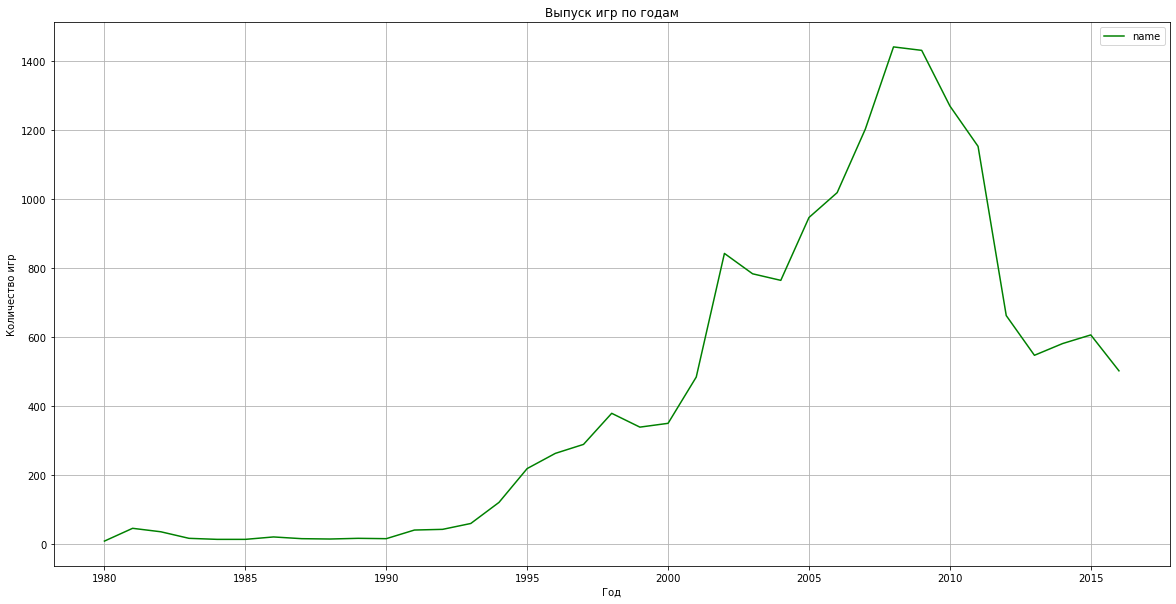

In [17]:
(games
    .query('year_of_release > 1900')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, 
          figsize=(20, 10), 
          title='Выпуск игр по годам',
          xlabel='Год',
          ylabel='Количество игр',
          color='green')
)

plt.show()

Думаю, точно можно не учитывать продажи игр до 2000 года: там несопоставимо низкие продажи (поскольку игр в принципе выпускалось меньше), и платформы, для которых выпускались игры устарели. Но, известно, что игры на платформы (например, различные консоли) имеют ограниченный срок выпуска, поэтому, возможно, мы можем еще сократить интервал, на котором будем анализировать данные.

### 3.2 Актуальный период для анализа

Посмотрим, как менялись продажи по платформам от года к году: так мы узнаем сколько "живут" платформы и выявим актуальные на 2016-2017 годы. Для начала узнаем, какие платформы были самыми популярными, а значит, на них можно ориентироваться.

In [18]:
# Находим платформы с самым большим количеством проданных игр по всему миру
platform_sales = (games
                  .query('year_of_release > 1900')
                  .pivot_table(index='platform', values='overall_sales', aggfunc=['sum'])
                  )
platform_sales.columns = ['sales']
platform_sales.sort_values(by='sales', ascending=False)

,sales
platform,
PS2,1245.96
X360,966.61
PS3,934.71
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,292.77


Явных лидеров шесть:
1. PlayStation 2
2. Xbox 360
3. PlayStation 3
4. Nintendo Wii
5. Nintendo DS
6. PlayStation

Их продажи в разы превышают продажи следующих в рейтинге платформ. При этом PS - старая платформа, пик ее продаж пришелся на конец 90-х (увидела в сводной таблице), поэтому пришлось сделать шаг назад и убрать ее из сводной таблицы.

Посмотрим, в течение какого времени продаются игры для самых популярных платформ, кроме PS.

In [19]:
top_platforms_list = list(platform_sales.sort_values(by='sales', ascending=False).head().index)

top_platforms_dynamic = (games
                        .query('platform == @top_platforms_list[0] & year_of_release > 1900')
                        .pivot_table(index='year_of_release', values='overall_sales', aggfunc='sum')    
                         )

top_platforms_short_list = top_platforms_list[1:]

i = 0

for plat in top_platforms_short_list:
    
    plat_dynamics = (games
                    .query('platform == @plat & year_of_release > 1900')
                    .pivot_table(index='year_of_release', values='overall_sales', aggfunc='sum')    
                    )
    top_platforms_dynamic = pd.merge(top_platforms_dynamic, 
                                     plat_dynamics, 
                                     how='outer', 
                                     on='year_of_release',
                                     suffixes=(i, i+1),
                                    )
                            
    i += 1
    
    
    
top_platforms_dynamic.columns = top_platforms_list

top_platforms_dynamic.sort_index()

,PS2,X360,PS3,Wii,DS
year_of_release,,,,,
1985,NaN,NaN,NaN,NaN,0.02
2000,39.17,NaN,NaN,NaN,NaN
2001,166.43,NaN,NaN,NaN,NaN
2002,208.36,NaN,NaN,NaN,NaN
2003,193.05,NaN,NaN,NaN,NaN
2004,211.81,NaN,NaN,NaN,17.27
2005,160.66,9.22,0.19,NaN,130.14
2006,103.99,51.79,20.96,140.19,119.81
2007,76.10,95.41,73.19,153.41,147.23


Для DS есть необычное значение - 1985 год, хотя сама консоль продается с 2004 года. Эту аномалию создала одна игра, проверив информацию о ней, я выяснила, что это действительно старая игра, но, похоже она получила переиздание. Будем считать это значение выбросом и не учтем при построении графика.

In [20]:
# аномалия для консоли DS
games.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,999,99.9,Undefined,0.02


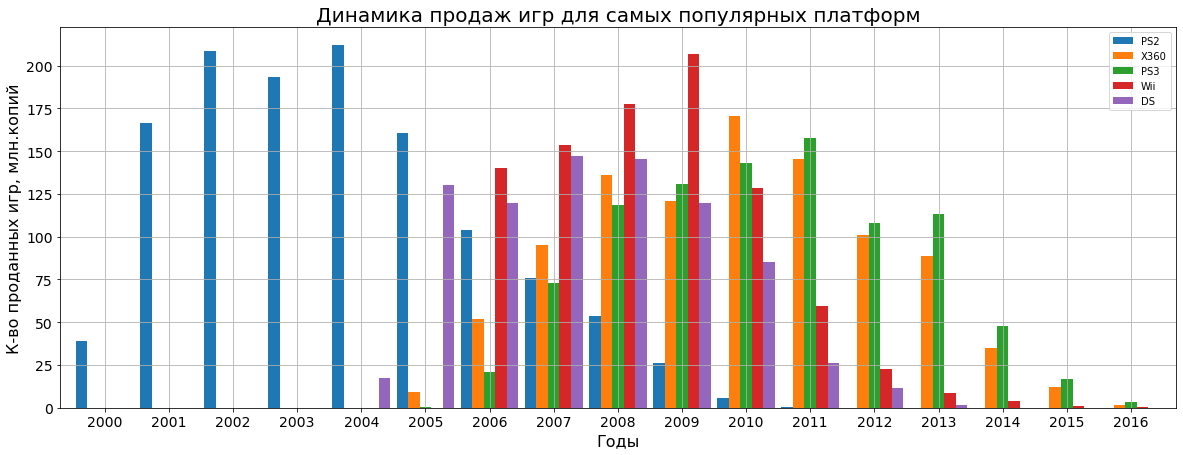

In [21]:
plat_dynamics = (top_platforms_dynamic
                 .query('index >= 2000')
                 .plot(grid=True, 
                       kind='bar',
                       figsize=(20, 7), 
                       fontsize=14,
                       width=0.9
                        )
                )
plat_dynamics.set_title('Динамика продаж игр для самых популярных платформ', fontsize=20)
plat_dynamics.set_xlabel('Годы', fontsize=16)
plat_dynamics.set_ylabel('К-во проданных игр, млн.копий', fontsize=16)
plt.xticks(rotation=0)

plt.show()

Из диаграммы можно увидеть, что игры на платформу продаются в течение примерно 10-11 лет, отсюда можно сделать вывод, что PS2, несмотря на свою популярность, не подходит для анализа, потому что ее продажи игр для этой платформы закончились в 2011 году и не имеет смысла рассматривать период ее пиковых продаж, отсечем период до 2004 года (когда на рынок вышла Nintendo DS)

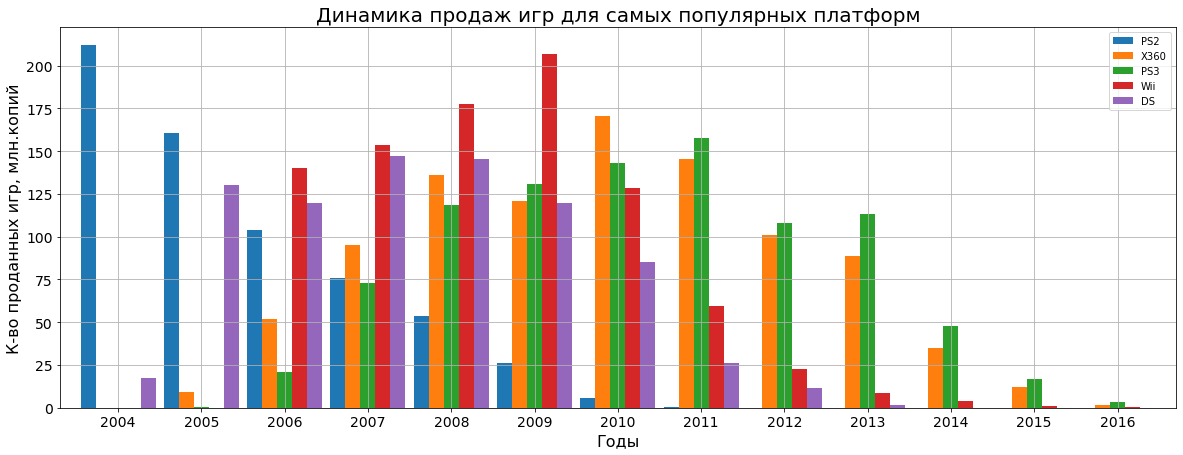

In [22]:
plat_dynamics = (top_platforms_dynamic
                 .query('index >= 2004')
                 .plot(grid=True, 
                       kind='bar',
                       figsize=(20, 7), 
                       fontsize=14,
                       width=0.9
                        )
                )
plat_dynamics.set_title('Динамика продаж игр для самых популярных платформ', fontsize=20)
plat_dynamics.set_xlabel('Годы', fontsize=16)
plat_dynamics.set_ylabel('К-во проданных игр, млн.копий', fontsize=16)

plt.xticks(rotation=0, )

plt.show()

Теперь график выглядит нагляднее. 

Итак, в среднем игры на платформы продаются в течение 10-11 лет. При этом в первые два года игр продается не так много, это может быть связано с тем, что на анализ успешности новой платформы и разработку игр нужно время. Здесь исключением является Wii - продажи игр на старте оказались высокими, но связано с тем, что продажи консоли по всему миру начались одновременно, плюс к ее выходу на рынок было готово значительно большее количество игр, в сравнении с другими платформами (сравнила количество игр, доступных при запуске продаж консолей с Википедии). Но в целом динамика продаж Wii похожа на динамику других платформ.

На третий-четвертый год "жизни" платформы на рынке происходит пик продаж совсестимых игр, затем начинается постепенный спад.

В последние два-три года (в некоторых случаях и больше) продажи еще меньше, это связано с тем, что к завершающему этапу жизненного цикла платформы успевают появится новые, выпуск игр на устаревающую платформу прекращается, может прекратиться и поддержка производителем, поэтому заинтересованность покупателей сходит на нет.

На графике заметно, что активнее всего игры на платформы продаются в период 3-4 года в середине их жизненного цикла. В этот же промежуток можно наблюдать большое разнообразие популярных платформ. Именно это сочетание факторов нам и нужно - высокие продажи и большое разнообразие дает возможность определить факторы успешности игр при наличии активной конкуренции. Для самых популярных консолей таким периодом стал 2007-2010 или 2008-2011 - в обоих случаях 4 года. Полагаю, что этот временной отрезок можно принять за **актуальный период** для дальнейшего анализа, но в этот период нужно включить и 2017, ведь мы хотим чтобы будущий год стал максимально прибыльным. Значит, будем рассматривать игры, вышедшие в последние 3 года (рассматриваемого периода), с 2013.

In [23]:
# выделяем актуальный период
actual_games = games.query('year_of_release >= 2013')

### 3.3 Анализ популярности платформ

Узнаем, какие платформы в актуальном периоде лидируют по продажам, какие растут, а какие падают. Определим потенциально прибыльные платформы.

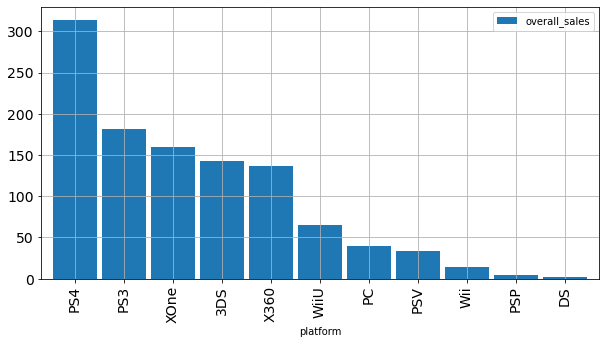

In [24]:
(actual_games
 .pivot_table(index='platform', values='overall_sales', aggfunc='sum')
 .sort_values(by='overall_sales', ascending=False)
 .plot(grid=True, figsize=(10, 5), fontsize=14, kind='bar', width=0.9)
)

plt.show()

Получили распределение по количеству продаж. Можно выделить пятерку лидеров продаж среди актуальных на 2016 год платформ:
- PlayStation 4
- PlayStation 3
- Xbox One 
- Nintendo 3DS
- Xbox 360

Посмотрим на динамиеку продаж: возможно, какие-то из платформ находятся в стадии роста, а популярные могут уже пройти свой пик популярности.

Построив сводную таблицу в первый раз, я заметила, что продажи на платформы DS, PS2 и PSP прекратились, не имеет смысла анализировать данные по ним, уберем их из актуальной таблицы. 

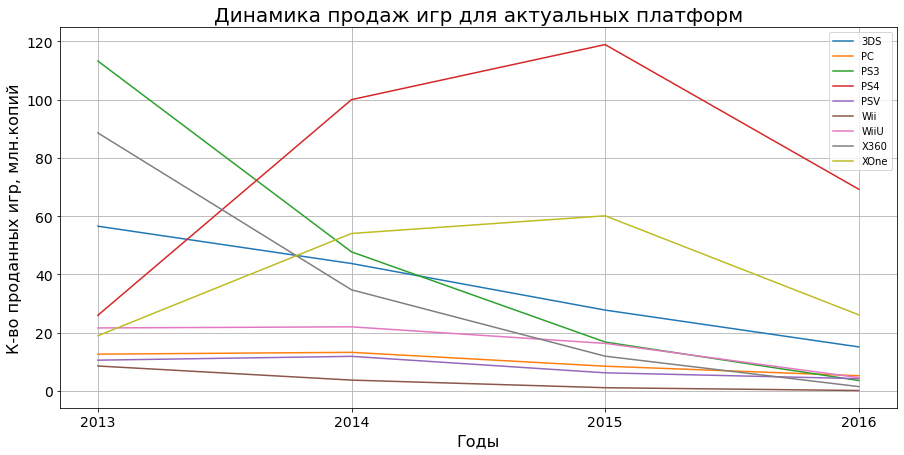

,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,12.66,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


In [25]:
actual_games = (actual_games
                .loc[(actual_games['platform'] != "DS")&(actual_games['platform'] != "PSP")&(actual_games['platform'] != "PS2")]
               )

actual_platforms_list = list(actual_games
                             .pivot_table(index='platform', values='overall_sales', aggfunc='sum')
                             .index
                            )

actual_platforms_dynamic = (actual_games
                            .query('platform == @actual_platforms_list[0]')
                            .pivot_table(index='year_of_release', values='overall_sales', aggfunc='sum')    
                             )

actual_platforms_short_list = actual_platforms_list[1:]

i = 0

for plat in actual_platforms_short_list:
    
    plat_dynamics = (actual_games
                    .query('platform == @plat')
                    .pivot_table(index='year_of_release', values='overall_sales', aggfunc='sum')    
                    )
    actual_platforms_dynamic = pd.merge(actual_platforms_dynamic,
                                        plat_dynamics, 
                                        how='outer', 
                                        on='year_of_release',
                                        suffixes=(i, i+1),
                                       )
                            
    i += 1
       
actual_platforms_dynamic.columns = actual_platforms_list

act_plat_dynamics = (actual_platforms_dynamic
                     .plot(grid=True, figsize=(15, 7), fontsize=14)
                    )
act_plat_dynamics.set_title('Динамика продаж игр для актуальных платформ', fontsize=20)
act_plat_dynamics.set_xlabel('Годы', fontsize=16)
act_plat_dynamics.set_ylabel('К-во проданных игр, млн.копий', fontsize=16)
plt.xticks(list(actual_platforms_dynamic.index), rotation=0)

plt.show()

actual_platforms_dynamic

Из графика видно, что платформы 3DS, PS3, X360 и другие менее популярные платформы имеют тенденцию к снижению популярности. Но в 2016 году падение популярности игр на эти платформах выглядит резким: у всех падение примерно в два раза.

А с относительно новыми платформами PS4 и XOne ситуация не вполне понятная - они набирали популярность до 2015 года включительно, а теперь показывают снижение. Хотя на 2016 год для них должен был прийтись пик продаж. Что же могло произойти? 

В описании проекта было указано, что данные за 2016 годы могут быть неполными. Это похоже на правду, потому что не хватает данных о продажах - возможно, учтена только первая половина года, потому что падение продаж для всех платформ выглядит резким и неожиданным. Наверное, это возможно, потому что по условию проекта мы располагаем информацией на декабрь 2016, а данные за вторую половину года будут уточнены позже. Поэтому буду считать актуальной тенденцию на 2015 год.

### 3.4 Диаграмма размаха

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам - это позволит посмотреть на распределение продаж игр для каждой из них.

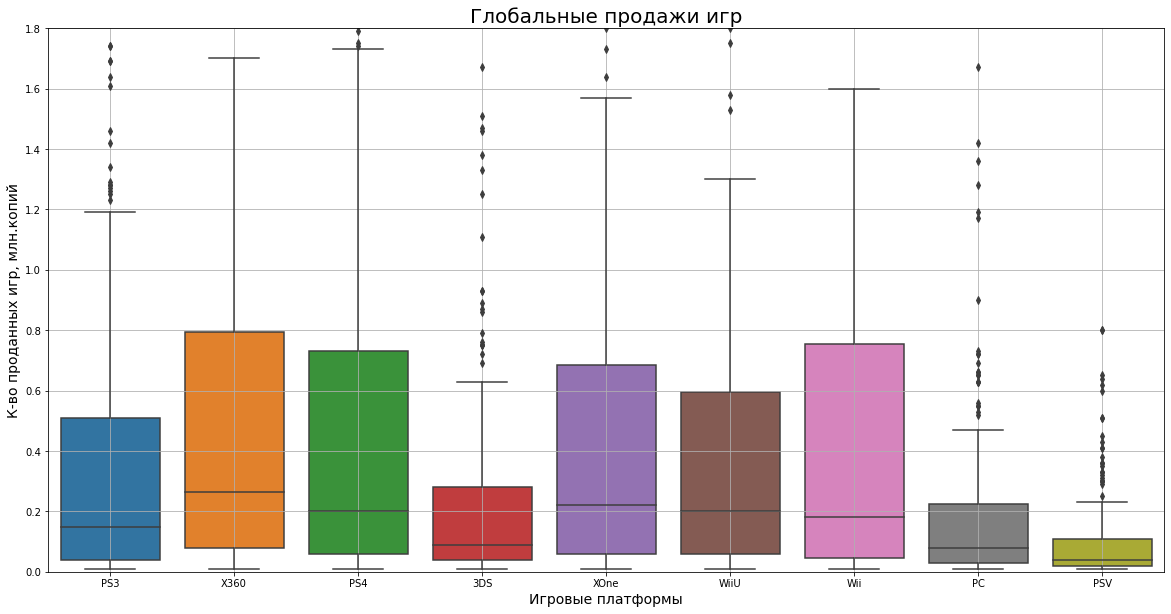

In [26]:
plt.figure(figsize=(20, 10))
box = sns.boxplot(data=actual_games,
                  x='platform',
                  y='overall_sales'
                 )
box.set_ylim(0, 1.8)
box.grid()
box.set_title('Глобальные продажи игр', fontsize=20)
box.set_xlabel('Игровые платформы', fontsize=14)
box.set_ylabel('К-во проданных игр, млн.копий', fontsize=14)
plt.show()

Интересно, что медианные продажи игр на лидирующих платформах похожи: по 0.2 млн.копий для PS3, PS4 и Wii и 0.23 для XOne и WiiU. Выделяются X360, где медианное значение выше - 0.3 млн.копий и 3DS, для которой медиана смещена вниз до 0.1 млн. копий.

Межквартильный размах для игр на консоли распределены следующим образом:
- PS3: 0.05-0.5 млн.копий
- PS4: 0.06-0.75 млн.копий
- X360: 0.1-0.8 млн.копий
- 3DS: 0.05-0.3 млн.копий
- XOne: 0.1-0.65 млн.копий
- Wii: 0.1-0.75 млн.копий
- WiiU: 0.1-0.6 млн.копий

Эти значения показывают, в каком диапазоне чаще всего находится количество проданных копий каждой игры на этих платформах.
Обратить внимание можно на платформы PS4, X360, Wii - эти платформы показывают большие продажи и игры на них продаются также активно, также можно рассматирвать XOne - т.к. это новая платформа и она может иметь тенденцию к росту продаж.


### 3.5 Влияние оценок пользователей и критиков на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

Рассмотрим самую "продающуюся" платформу - PS4.

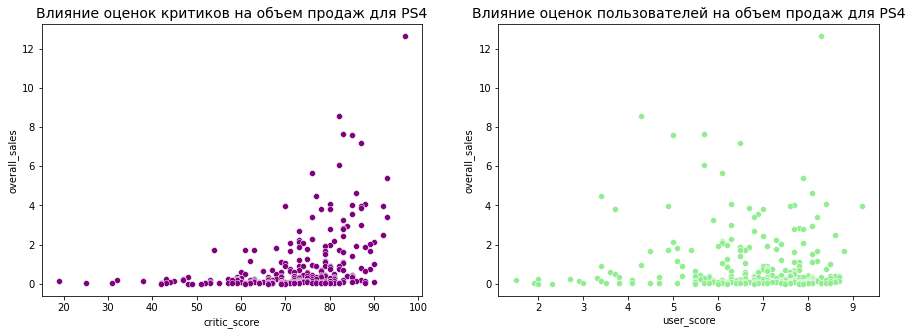

Корреляция оценок критиков и объема продаж для PS4: 0.41
Корреляция оценок пользователей и объема продаж для PS4: -0.06


In [27]:
critic_scores_stat = actual_games.query('platform == "PS4" & critic_score < 999')
user_scores_stat = actual_games.query('platform == "PS4" & user_score < 99.9')
pylab.figure(figsize=(15, 5))

# находим связь с оценками критиков
pylab.subplot (1, 2, 1)
sns.scatterplot(data=critic_scores_stat, x='critic_score', y='overall_sales', color='purple')
plt.title('Влияние оценок критиков на объем продаж для PS4', fontsize=14)

# находим связь с оценками пользователей
pylab.subplot (1, 2, 2)
sns.scatterplot(data=user_scores_stat, x='user_score', y='overall_sales', color='lightgreen')
plt.title('Влияние оценок пользователей на объем продаж для PS4', fontsize=14)

plt.show()

print('Корреляция оценок критиков и объема продаж для PS4:',
     round(critic_scores_stat['critic_score'].corr(critic_scores_stat['overall_sales']), 2)
     )

print('Корреляция оценок пользователей и объема продаж для PS4:',
     round(critic_scores_stat['user_score'].corr(critic_scores_stat['overall_sales']), 2)
     )

Итак, объем продаж игр на PS4 зависит от отзывов критиков в небольшой степени (между этими данными слабая корреляция 0.41).

А вот отзывы пользователей вообще не влияют на продажи (очень слабая корреляция -0.06, т.е. взаимосвязи почти нет). Похоже, при выборе игры люди в большей степени ориентируются на отзывы критиков, как на более авторитетные или на какие-то другие аспекты и только потом, купив и поиграв, дают оценку - отсюда, возможно, и взялись высокие продажи у игр, оцененных на 5-6 очков из 10.

Посмотрим, какая картина на других платформах, возможно, на них оценки имеют большее влияние на продажи. Рассмотрим еще 4 платформы с самыми высокими продажами:
- PS3
- XOne
- 3DS
- X360


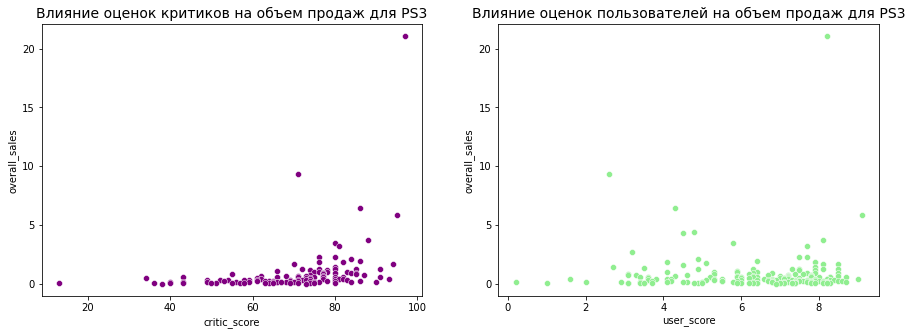

Корреляция оценок критиков и объема продаж для PS3: 0.33
Корреляция оценок пользователей и объема продаж для PS3: -0.03


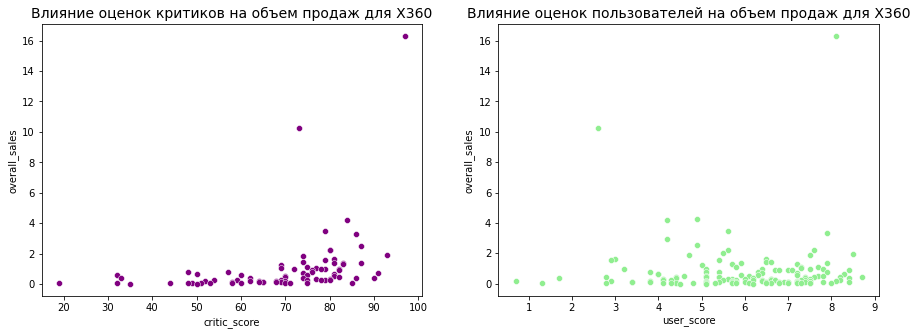

Корреляция оценок критиков и объема продаж для X360: 0.35
Корреляция оценок пользователей и объема продаж для X360: -0.01


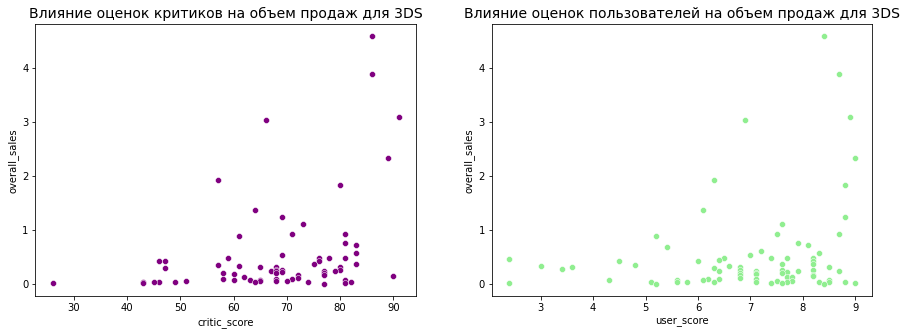

Корреляция оценок критиков и объема продаж для 3DS: 0.36
Корреляция оценок пользователей и объема продаж для 3DS: -0.12


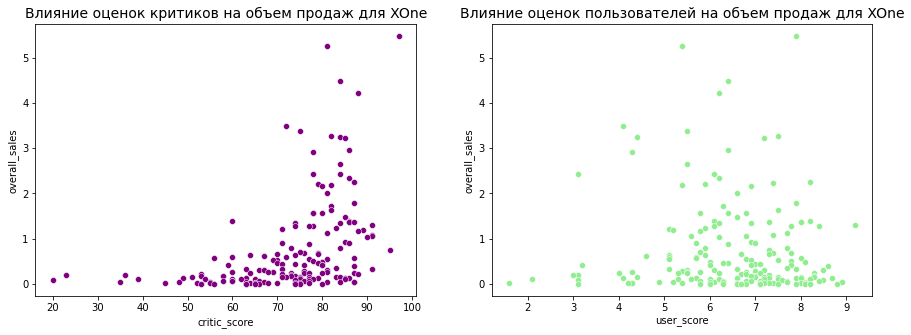

Корреляция оценок критиков и объема продаж для XOne: 0.42
Корреляция оценок пользователей и объема продаж для XOne: -0.12


In [28]:
# Изучим взаимосвязь оценок пользователей и критиков для платформ, лидирующих по количеству проданных игр
stat_for_platforms = ['PS3', 'X360', '3DS', 'XOne']

for plat in stat_for_platforms:
    
    critic_scores_stat = actual_games.query('platform == @plat & critic_score < 999')
    user_scores_stat = actual_games.query('platform == @plat & user_score < 99.9')
    pylab.figure(figsize=(15, 5))
    
    pylab.subplot (1, 2, 1)
    sns.scatterplot(data=critic_scores_stat, x='critic_score', y='overall_sales', color='purple')
    plt.title(f'Влияние оценок критиков на объем продаж для {plat}', fontsize=14)

    pylab.subplot (1, 2, 2)
    sns.scatterplot(data=user_scores_stat, x='user_score', y='overall_sales', color='lightgreen')
    plt.title(f'Влияние оценок пользователей на объем продаж для {plat}', fontsize=14)
    
    plt.show()
    
    print(f'Корреляция оценок критиков и объема продаж для {plat}:',
         round(critic_scores_stat['critic_score'].corr(critic_scores_stat['overall_sales']), 2)
         )    
    print(f'Корреляция оценок пользователей и объема продаж для {plat}:',
         round(critic_scores_stat['user_score'].corr(critic_scores_stat['overall_sales']), 2)
         )
    

Нет, картина по самым продаваемым платформам не изменилась: наблюдаем все ту же слабую связь между оценками критиков и объемом продаж, причем для все платформ она примерна одинакова - в районе 0/3-0.4. Оценки пользоватлей так же, как и для PS4, не влияют на продажи игр. Будем считать это закономерным для всех платформ.

Однако отмечу, что это распределение, на самом деле, не дает много информации и имеет смысл рассматривать отзывы внутри жанров, потому что пользователи, как правило, отдают предпочтения небольшому количеству жанров игр.

### 3.6 Распределение игр по жанрам

Посмотрим, на общее распределение игр по жанрам. Попробуем выделить самые прибыльные жанры, а также жанры с высокими и низкими продажами. Для этого удобно использовать столбчатую или круговую диаграмму: я использую круговую, т.к. такая диаграмма особенно наглядна для ограниченного числа параметров.

Интересно посмотреть количество проданных игр по общему количеству, а также по медиане: это позволит проанализировать данные без влияния выбросов, созданных, к примеру, хитовыми играми.

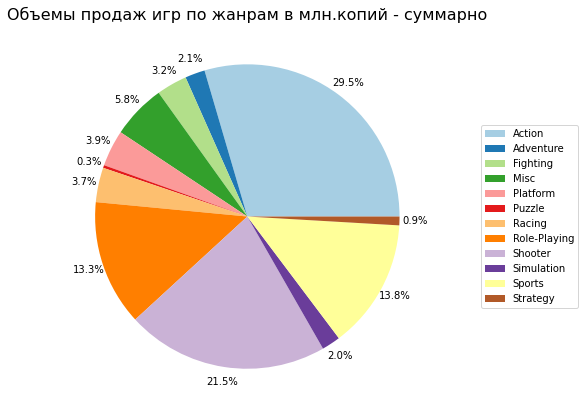

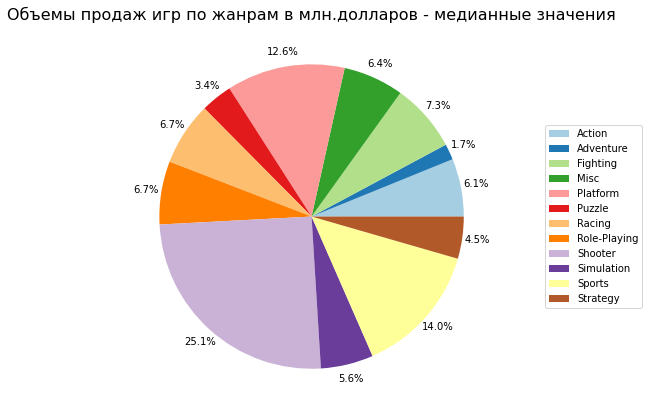

In [41]:
# определяем данные для построения круговой диаграммы - по сумме
data = actual_games.pivot_table(index='genre', values='overall_sales', aggfunc='sum')
data.columns = ['sales']

colors = sns.color_palette('Paired')    # палитра

pylab.figure(figsize=(10, 7))
plt.pie(data['sales'], 
        labels = list(data.index), 
        autopct='%.1f%%', 
        colors=colors, 
        pctdistance=1.1, 
        labeldistance=None
       )
plt.title('Объемы продаж игр по жанрам в млн.копий - суммарно', fontsize=16)    # добавление заголовка
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))    # легенда
plt.show()



# определяем данные для построения круговой диаграммы - по медиане
data = actual_games.pivot_table(index='genre', values='overall_sales', aggfunc='median')
data.columns = ['sales']

colors = sns.color_palette('Paired')    # палитра

pylab.figure(figsize=(10, 7))
plt.pie(data['sales'], 
        labels = list(data.index), 
        autopct='%.1f%%', 
        colors=colors, 
        pctdistance=1.1, 
        labeldistance=None
       )
plt.title('Объемы продаж игр по жанрам в млн.долларов - медианные значения', fontsize=16)    # добавление заголовка
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))    # легенда
plt.show()

Больше всего копий продано у следующих жанров:
1. Action - 29.5%
2. Shooter - 21.5%
3. Sports - 13.8%
4. Role-Playing - 13.3%
5. Misc - 6.9% (хотя это не жанр, а некое их сочетание)

**Action** и **Shooter**, безусловно, лидируют, половина продаж приходится на эти жанры.

Теперь составим список жанров с самыми низкими продажами (начиная с самого непопулярного):
1. Puzzle - 0.3%
2. Strategy - 0.9%
3. Adventure - 2.1%
4. Simulation - 2.5%
5. Fighting - 3.4%

Меньше всего продано копий игр в жанрах **Puzzle** и в жанре **Strategy** - на них приходится чуть больше 1% от всех продаж.

Но эти значения рассчитаны по количеству проданных копий, поэтому на суммарные продажи могли повлиять отдельные супер-популярные игры. Чтобы избавиться от этого влияния, посмотрим на медианные значения продаж.

И вновь обращаем внимание на **Action** - медианное значение небольшое - 6.1%, при самой большой доле суммарно проданных копий. Это может означать, что в этом жанре выпускается не так много игр, но они продаются очень большими тиражами. Это делает данный жанр самым прибыльным из рассматриваемых. Также к прибыльным жанрам можно отнести **Shooter** и **Sports** - здесь можно отметить как большое разнообразие игр и соразмерные продажи. Также хорошо продаются игры в жанре **Role-Playing** - здесь также продаются много копий на одну выпущенную игру.

Очевидно неприбыльными можно назвать жанры **Platform**, **Puzzle** и **Racing** - при относительно большом разнообразии игр копий каждой продается немного.

### Вывод по разделу

Самой важной частью этого раздела стало выделение актуального периода для анализа данных - в данном случае он составил 3-4 года, т.е. в дальнейшем мы будем работать с данными за последние 3 года, чтобы иметь возможность сделать прогноз на ближайший год.
Для этого потребовалось проанализировать срок, за который появляются и исчезают платформы: выяснилось, что в середине "жизни" платформы происходит не только пик продаж игр для нее, но и наибольшая конкуренция с другими платформами.
Стадия роста отмечается у платформ **PS4** и **Xbox One**. Остальные, несмотря на высокие показатели продаж, находятся в стадии снижения спроса.

Далее проанализировали разброс продаж игр на каждую из актуальных платформ, чтобы выяснить, на какие из них следует обратить внимание при прогнозе.
Здесь также можно отметить **PS4** и **Xbox One**, а также **Xbox 360**.

Затем было исследовано влияние оценок критиков и пользователей на продажи игр: выяснилось, что для всех актуальных платформ оценки пользователей не имеют влияния на продажи, а оценки критиков влияют в небольшой степени (возможно, в сочетании с другими факторами).

Наконец, были выделены самые прибыльные и неприбыльные жанры: получилось явно выделить **Action** - игры этого жанра продаются самыми большими тиражами, что делает его самым прибыльным, менее успешными, но довольно прибыльными можно обозначить **Shooter** и **Sports** (большое разнообразие и высокие продажи), а также **Role-Playing** - здесь также продаются много копий на одну выпущенную игру, как и для экшенов.

Очевидно неприбыльными можно назвать жанры **Platform**, **Puzzle** и **Racing** - при большом разнообразии игр копий каждой продается немного.

## 4. Портрет пользователей по регионам

В этом разделе предстоит определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Присутствие платформы в регионе определяется наличием продаж игр на данную платформу в конкретном регионе.

### 4.1 Самые популярные платформы в каждом регионе

Выделим топ-5 самых популярных платформ для каждого региона.

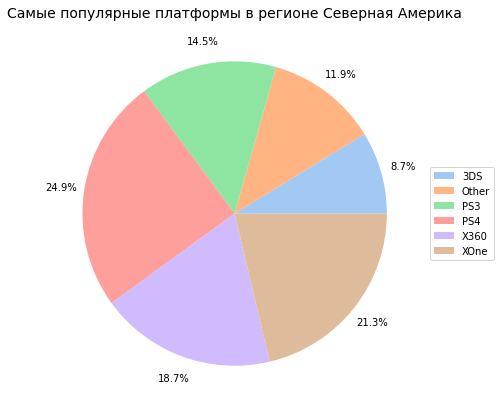

ТОП-5 популярных платформ в регионе Северная Америка 
        sales
PS4   108.74
XOne   93.12
X360   81.66
PS3    63.50
3DS    38.20


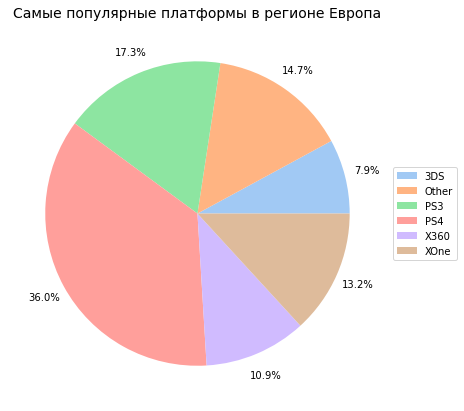

ТОП-5 популярных платформ в регионе Европа 
        sales
PS4   141.09
PS3    67.81
XOne   51.59
X360   42.52
3DS    30.96


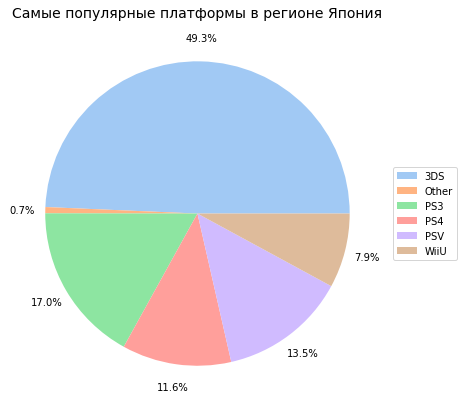

ТОП-5 популярных платформ в регионе Япония 
       sales
3DS   67.81
PS3   23.35
PSV   18.59
PS4   15.96
WiiU  10.88


In [31]:
# Эта функция относит непопулярные платформы в категорию Other
def platform_def(row):
    
    global reg_sales
    
    poplist = list(reg_sales.sort_values(by='sales', ascending=False).head().index)
    
    if row.name not in poplist:
        return 'Other'
    else:
        return row.name

# Формируем список рассматриваемых регионов
regions = {'na_sales': 'Северная Америка',
           'eu_sales': 'Европа',
           'jp_sales': 'Япония'    
           }

for reg in regions.keys():
    
    reg_sales = actual_games.pivot_table(index='platform', values=reg, aggfunc='sum')
    reg_sales.columns = ['sales']
    reg_sales.index = reg_sales.apply(platform_def, axis=1)
    reg_sales = reg_sales.groupby(reg_sales.index).sum()
    
    colors = sns.color_palette('pastel')
    pylab.figure(figsize=(7, 7))
    plt.pie(reg_sales['sales'], 
            labels = list(reg_sales.index), 
            autopct='%.1f%%', 
            colors=colors, 
            pctdistance=1.15, 
            labeldistance=None
           )
    plt.title(f'Самые популярные платформы в регионе {regions[reg]}', fontsize=14)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.show()    
    
    print(f'ТОП-5 популярных платформ в регионе {regions[reg]} \n',
          reg_sales.query('index != "Other"').sort_values(by='sales', ascending=False).head()
         )

Итак, в регионе Северная Америка наиболее попуряна платформа PlayStation 4 (24.9% продаж), затем следуют Xbox One с 21.3% и  Xbox 360 с 18.7%. Неудивительно, что X360 лидирует в регионе - это американская приставка, скорее всего, более доступна по цене в этом регионе.

В Европе примерно половину рынка составляют PlayStation 4 (36.0%) и PlayStation 3 (17.3%) - интересно, получается, половину продаж дали платформы одного семейства.

В Японии половину продаж дали игры для портативной Nintendo 3DS - 49.3%, а следующая в топе PS3 дала 17.0% продаж. В этом регионе в принципе отличается состав лидеров - в топе присутствуют PlayStation Vita (13.5%) и Nintendo Wii (7.9%), которые не столь популярны в остальных регионах. При этом лидирующая в других регионах PlayStation 4 - четвертая в топе с 11.6% продаж.

Могу предположить, что различие в распределении связано с жанрами игр, предпочтительными в каждом из регионов или даже конкретными играми, уникальными для каждой платформы. Например, для Японии такая разница могла возникнуть потому, что довольно много игр для 3DS так и не вышла на мировые рынки, оставаясь внутри страны.

Далее рассмотрим распределение жанров в регионах и уточним пользовательский портрет.

### 4.2 Самые популярные жанры в регионах

Выделим топ-5 самых популярных жанров игр для каждого региона.

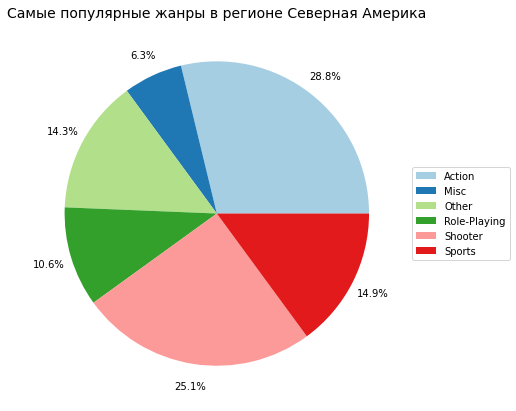

ТОП-5 популярных жанров в регионе Северная Америка 
                sales
Action        125.85
Shooter       109.74
Sports         65.27
Role-Playing   46.40
Misc           27.46


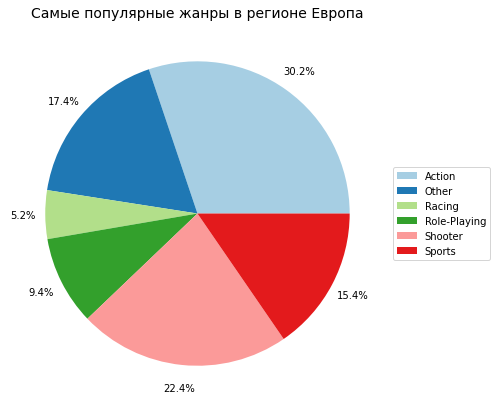

ТОП-5 популярных жанров в регионе Европа 
                sales
Action        118.10
Shooter        87.86
Sports         60.34
Role-Playing   36.97
Racing         20.19


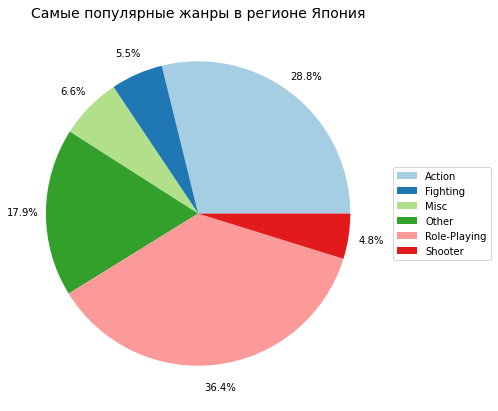

ТОП-5 популярных жанров в регионе Япония 
               sales
Role-Playing  50.01
Action        39.65
Misc           9.03
Fighting       7.63
Shooter        6.61


In [32]:
for reg in regions.keys():
    
    reg_sales = actual_games.pivot_table(index='genre', values=reg, aggfunc='sum')
    reg_sales.columns = ['sales']
    reg_sales.index = reg_sales.apply(platform_def, axis=1)
    reg_sales = reg_sales.groupby(reg_sales.index).sum()
    
    colors = sns.color_palette("Paired")
    pylab.figure(figsize=(7, 7))
    plt.pie(reg_sales['sales'], 
            labels = list(reg_sales.index), 
            autopct='%.1f%%', 
            colors=colors, 
            pctdistance=1.15, 
            labeldistance=None
           )
    plt.title(f'Самые популярные жанры в регионе {regions[reg]}', fontsize=14)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.show()    
    
    print(f'ТОП-5 популярных жанров в регионе {regions[reg]} \n',
          reg_sales.query('index != "Other"').sort_values(by='sales', ascending=False).head()
         )

Кажется, предположение о предпочитаемых жанрах для региона подтвердилось: если в Северной Америке и Европе распределение по жанрам похожее и пользователи предпочитают экшены и шутеры, то в Японии больше трети продаж игр приходится на ролевые. Кстати, это не противоречит популярности 3DS в Японии - эта консоль очень удобна для таких игр благодаря дополнительному сенсорному экрану и стилусу.

Интересно также, что в Северной Америке и Европе, несмотря на схожие предпочтения жанров различаются популярные консоли. Возможно, дело в том, что производимые в США консоли семейства Xbox доступнее в этом регионе.

### 4.3 Влияние рейтинга ESRB на продажи в регионах

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков», в нашем датасете присутствуют следующие категории:
- EC («Early childhood») - "Для детей младшего возраста" - подходят для детей от 3-х лет
- E («Everyone») - "Для всех" - подходят для всех возрастов
- E10+ («Everyone 10 and older») - "Для всех старше 10 лет" - подходят для пользователей старше 10 лет
- T («Teen») - "Для подростков" - подходят для пользователей от 13 лет
- M («Mature») - "Для взрослых" - подходят для пользователей от 17 лет
- AO («Adults Only 18+») - "Только для взрослых" - только для взрослых старше 18 лет
- Undefined - так мы обозначили игры, которых не указан рейтинг

В этой части выясним, влияет ли рейтинг игры на продажи в каждом из регионов.

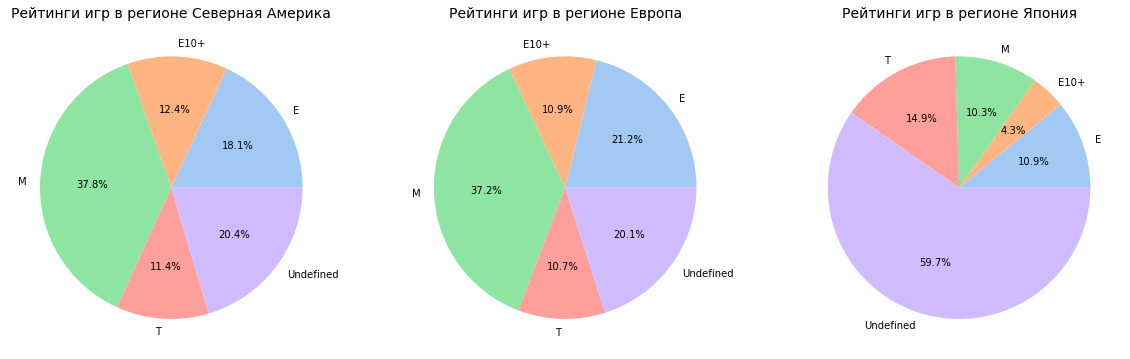

In [33]:
i = 1
pylab.figure(figsize=(20, 7))

for reg in regions.keys():
    
    reg_sales = actual_games.pivot_table(index='rating', values=reg, aggfunc='sum')
    reg_sales.columns = ['sales']
    
    colors = sns.color_palette("pastel")
       
    pylab.subplot (1, 3, i)    
    
    plt.pie(reg_sales['sales'], 
            labels = list(reg_sales.index), 
            autopct='%.1f%%', 
            colors=colors, 
           )
    plt.title(f'Рейтинги игр в регионе {regions[reg]}', fontsize=14)  
    
    i+=1
    
plt.show()     

И снова наблюдаем похожее распределение рейтингов в Америке и Европе - больше всего игр в категории **М** - для пользователей старше 17 лет (37-38% в обоих регионах), это не противоречит популярности жанров экшен и шутер, которые зачастую имеют такой рейтинг или выше, зависит от содержания. В Европе тоже есть своя рейтинговая система, но она схожа по критериям с ESRB, поэтому полученное распределение по рейтингам актуально и для Европы, хотя пропуски можно объяснить и тем, что игры могли получить внутреннюю европейскую маркировку PEGI, но для отдельных игр она, возможно отличается.

В этих регионах довольно большой процент игр с **неопределенным рейтингом** - порядка 20%, это может быть связано с тем, что компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки, хотя размещение рейтинга на упакове/странице игры очень желательно, некоторые магазины требуют маркировки. Сомневаюсь, что это единственная причина отсутствия рейтина, могли также сказаться пропуски.

Во этих двух регионах довольно популярны игры для всех - с рейтингом **E**, в которые можно играть всей семьей: 18.1% в Америке, 21.2% в Европе и 10.9% в Японии.

Япония выделяется тем, что пользователи оттуда выбирают игры с **неопределенным рейтингом** - таких 59.7% продаж. Это можно от части объяснить тем, что в этой стране есть собственная организация, занимающаяся определением рейтинга игр - CERO и ее оценки могут значительно отличаться от ESRB, плюс достаточно большое количество игр не выходят на мировые рынки и не получают оценку рейтинга, кроме CERO. При этом игры для взрослых, распространенные в Америке и Европе не очень популярны - 10.3%.

### 4.4 Вывод по портрету пользователя

Подытоживая этот раздел, составим описание особенностей пользователей в каждом регионе.

#### Северная Америка (NA)
Самые популярные платформы в этом регионе:      
- Play Station 4
- Xbox One
- Xbox 360
- Play Station 3
- Nintendo 3DS
При этом почти половину рынка составляют игры для **Xbox One** и **Play Station 3**.

Пользователи из региона Северная Америка предпочитают игры жанров **Action** и **Shooter** - на них приходится больше половины всех  всех продаж, также популярны спортивные игры (жанр **Sports** - 14.9%).

Чаще всего в этом регионе покупают игры категории **M** - для взрослых (37.8%), в то же время большая доля продаж приходится на игры категории **E** (18.1%), игры других рейтингов покупают с примерно одинаковой частотой (11-12%), также много игр с **неопределенным рейтингом** - здесь мог сказаться отказ разработчика от сертификации или пропуск в датасете.

#### Европейский союз (EU)
Самые популярные платформы в этом регионе:      
- Play Station 4
- Play Station 3
- Xbox One
- Xbox 360
- Nintendo 3DS
Больше половины рынка составляют игры для **Play Station 4** и **Play Station 3**.

Пользователи из региона Европа, как и американские, предпочитают игры жанров **Action** и **Shooter** - на них приходится половина всех  всех продаж, также популярны спортивные игры (жанр **Sports** - 15.4%).

Чаще всего в этом регионе покупают игры категории **M** - для взрослых (37.2%), в то же время большая доля продаж приходится на игры категории **E** (21.2%), игры с **неопределенным рейтингом** - третьи по объему продаж (20.1%), игры других рейтингов покупают с примерно одинаковой частотой (около 12%). Могу предположить, что эти игры получили обязательную в Европе маркировку PEGI вместо американской или это обычные пропуски.

В целом, портрет европейского пользователя похож на пользователя из Северной Америки, основное различие -  в выборе игровых платформ, пользователи из Северной Америке предпочитают полуярнее семейство Xbox, возможно, потому, что она производится в США и цена в этом регионе может быть ниже в сравнении с другими.

#### Япония (JP)
Самые популярные платформы в этом регионе:      
- Nintendo 3DS
- Play Station 3
- Play Station Vita
- Play Station 4
- Nintendo WiiU
При этом игры для одной только **Nintendo 3DS** составляют почти половину рынка (49.3%), на втром месте игры для **Play Station 3** (17%). В этом регионы непопулярно семейство Xbox из-за большого выбора собственных платформ. Их замещают **PlayStation Vita** и **Nintendo Wii U** - похоже, японцы отдают предпочтение портативным консолям (сюда относится и **3DS**).

В Японии отличается и распределение по жанрам: самым популярным здесь стали **Role-Playing** игры (36.4%). Второй по популярности жанр **Action** занимает с 28.8% продаж, также здесь в лидеры попал жанр **Fighting**, но его доля невелика. 

Чаще всего в этом регионе покупают игры без категории ESRB, такие составляют более половины рынка - 59.7%. Это может объясняться сильно отличающейся системой оценки рейтинга игр в Японии и большой популярностью ролевых игр, не все из которых на мировые рынки, а значит, не получивших категорию ESRB.

#### Итоги

Отмечу, что игры жанра **Action** имеют примерно одинаковую долю продаж во всех регионах (27-30%), то есть игры этого жанра везде найдут своего покупателя.

В регионах Северной Америки и Европы можно отметить, что чаще всего покупают игры с рейтингом **М**. При этом в Японии распределение отличается в сторону игр с неопределенным рейтингам, я связываю это с тем, что оценка ESRB может пересматриваться в Японии, а еще в этой стране большой внутренний рынок компьютерных игр, которые не оцениваются американской ассоциацией.

Я не думаю, что возрастной рейтинг игр непосредственно влияет на выбор игры покупателем: скорее всего покупатель будет обращать внимание на игровую платформу, для которой разработана игра (например, потому что он уже купил определенную приставку) и предпочитаемый жанр, и только потом может обратить внимание на возрастные ограничения (например, если выбирает игру для ребенка).

## 5. Проверка гипотез

В этом разделе сформулируем и проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверку гипотез будем проводить на данных за **актуальный период**.

Для проверки гипотез проведем t-test, используя метод st.ttest_ind(), предназначенный для проверки гипотез о равенстве средних двух независимых совокупностей.

Перед проверкой определимся с выбором значения уровня значимости *alpha*.
При проверке гипотезы уровень значимости определяется как вероятность отклонить нулевую гипотезу, если на самом деле она истинна.

Зачастую в качестве уровня значимости выбирают 5%, 1% и 0.1%. Если в результате теста было получено,  *p-value < alpha* то нулевая гипотеза отклоняется, а соответствующие результаты признаются статистически значимыми. К примеру, если утверждается, что «шанс того, что случившееся является совпадением, равны одному из ста», то имеется в виду уровень значимости 1%.
Казалось бы, чем меньше *alpha*, тем лучше, но в таком случае растет риск не отвергнуть ложную нулевую гипотезу.

Выберем компромиссное значение из самых распространенных *alpha = 1% = 0.01*

### 5.1 Проверка гипотезы о равенстве средних пользовательских рейтингах платформ Xbox One и PC

- **Нулевая гипотеза Н_0:** Средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC
- **Альтернативная гипотеза гипотеза Н_а:** Средний пользовательский рейтинг платформы Xbox One ≠ среднему пользовательскому рейтингу платформы PC
- **Уровень значимости:** alpha = 0.01

In [34]:
# значение equal_var=False потому что мы не можем быть уверены, что наши выборки равны по размеру
results = st.ttest_ind(actual_games.query('platform == "XOne" & user_score < 99.9')['user_score'],
                       actual_games.query('platform == "PC" & user_score < 99.9')['user_score'],
                       equal_var=False
                       )

alpha = 0.01

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 0.13888973874685429
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть нулевую гипотезу, значит, мы не можем утверждать, что средний пользовательский рейтинг игровых платформ Xbox One и PC не равны.**

Посмотрим, что на деле, рассчитаем среднепользовательский рейтинг:

In [35]:
print('Средний пользовательский рейтинг игр на платформе Xbox One:',
      actual_games.query('platform == "XOne" & user_score < 99.9')['user_score'].mean()
     )

print('Средний пользовательский рейтинг игр на PC:',
       actual_games.query('platform == "PC" & user_score < 99.9')['user_score'].mean()
     )

Средний пользовательский рейтинг игр на платформе Xbox One: 6.52142857142857
Средний пользовательский рейтинг игр на PC: 6.266242038216558


Средние рейтинги близки, но не одинаковы, а значение *p-value* показывает: вероятность **случайно** получить такое или большее различие равно почти 65%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### 5.2 Проверка гипотезы о равенстве средних пользовательских рейтингах жанров Action и Sports 

- **Нулевая гипотеза Н_0:** Средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports
- **Альтернативная гипотеза гипотеза Н_а:** Средний пользовательский рейтинг жанра Action ≠ среднему пользовательскому рейтингу жанра Sports
- **Уровень значимости:** alpha = 0.01

In [36]:
# значение equal_var=False потому что мы не можем быть уверены, что наши выборки равны по размеру
results = st.ttest_ind(actual_games.query('genre == "Action" & user_score < 99.9')['user_score'],
                       actual_games.query('genre == "Sports" & user_score < 99.9')['user_score'],
                       equal_var=False
                       )

alpha = 0.01

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 2.838205963551052e-20
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута, значит, средние пользовательские рейтинги игр в жанре и PC не равны.**

И снова рассчитаем средние пользовательские рейтинги:

In [37]:
print('Средний пользовательский рейтинг игр в жанре Action:',
      actual_games.query('genre == "Action" & user_score < 99.9')['user_score'].mean()
     )

print('Средний пользовательский рейтинг игр в жанре Sports:',
       actual_games.query('genre == "Sports" & user_score < 99.9')['user_score'].mean()
     )

Средний пользовательский рейтинг игр в жанре Action: 6.8384615384615435
Средний пользовательский рейтинг игр в жанре Sports: 5.249685534591195


Средние рейтинги различаются почти на 1 целый пункт, а очень маленькое значение *p-value* показывает на то, что вероятность **случайно** получить такое или большее различие очень и очень мала. Делаем вывод, что различие между рейтингами статистически значимо.

### 5.3 Вывод по разделу

В этом разделе были проверены гипотезы о равенстве двух независимых выборок, для этого были сформированы нулевые гипотезы, выбрано значение *alpha* и применен t-тест методом `st.ttest_ind`.

Нулевая гипотеза была сформирована согласно правилу, что она должна включать знак равенства: мы предполагаем, что средние значения выборок равны. Альтернативная гипотеза, в свою очередь, принимается, если мы вынуждены отбросить нулевую, поэтому для ее формулировки использовался знак неравенства.

Для определения надежности t-теста потребовалось выбрать значение *alpha = 1%* - выбрано как средний из популярных вариантов, дающий высокую точность, но без риска не отвергнуть ложную нулевую гипотезу.

Для наглядности были рассчитаны средние значения выборок и дано уточнение по *p-value*.

## 6. Общий вывод

Зафиксируем выводы по каждой группе исследований и обобщим.

#### Предобработка данных
В датасете обнаружено много пропусков значений, природу и закономерность которых не удалось отследить, а значит, и восстановить их. Однако числовые столбцы были дополнены выделяющимися значениями во избежание ошибок при обработке. Также для наглядности были заполнены тектсовые значения: 'Undefined' выглядит понятнее, чем 'NaN'. Строки с пропусками не были удалены, т.к. содержали другую, нужную для исследования информацию. На этом этапе был создан расчетный столбец, нужный для дальнейшего анализа.

#### Исследовательский анализ данных
Одним из первых, но при этом важнейших шагов на этом этапе было выявление **актуального периода**, который позволил бы построить качественный прогноз на будущий год, в данном случае это 3 года.

Затем был проведен **анализ популярности платформ** и выявлены тенденции роста и снижения продаж для них: так, PlayStation 4 и Xbox One находятся в стадии роста, остальные из популярных платформ медленно уходят. Отмечу, что на этом этапе пришлось столкнуться с неполнотой данных за 2016 год (не все продажи учтены) - это выяснилось т.к. у всех платформ обнаружилось неправдоподобно резкое падение продаж. Поэтому были учтены тенденции роста/снижения на 2015 год.

Диаграмма размаха также позволила сделать выводы о платформах с высокими продажами, на которые стоит о обратить внимание, планируя компании на будущий год: в данном случае выделились Xbox 360, PlayStation 3 и 4, а также Xbox One.

Далее было проанализировано **влияние оценок критиков и пользователей на продажи игр** для каждой из платформ: выяснилось, что оценка пользователей никак не влияет на продажи (это скорее предмет споров и обсуждений, чем реальный критерий покупки). Оценка критиков влияет в небольшой степени, но этот фактор можно учитывать при проведении компаний: возможно высокие рейтинги критиков позволят привлечь покупателей к новому продукту.

Далее были выявлены самые популярные жанры игр: предсказуемо, лидером оказался Action, затем следует Shooter, также следует обратить внимание на жанры Sports и Role-Play (для последнего есть региональные особенности).

#### Портрет пользователей по регионам
В этом разделе выявили сходства и различия **предпочтений пользователей по регионам**. Это важный раздел, т.к. знание пользовательского портрета в регионах позволит подстроить под них рекламные компании и, потенциально привлечь больше покупателей и, как следствие увеличить продажи.

Портрет составлялся по трем параметрам: предпочитаемая платформа, предпочитаемые жанры и возрастной рейтинг. Получилось, следующее:
- в регионе Северная Америна (NA) самыми популярными платформами оказались PlayStation 4 и XboxOne, предпочитаемые жанры здесь - Action и Shooter, чаще всего играм присвоен рейтинг для взрослых (М);
- в регионе Европа (EU) предпочтение отдают семейству PlayStation, самые популярные жанры те же, что и в Северной Америке, чаще всего игры маркированы для взрослых (рейтинг М);
- в регионе Япония (JP) порядка половины игр покупаются для консоли Nintendo 3DS, также популярна PlayStation 3, стоит отметить, что здесь предпочитают портативные консоли, что касается жанров - самыми популярными оказались Role-Playing (с большим отрывом за счет других жанров) и Action, жанр игр в половине случаев не определен из-за особенностей внутреннего рынка игр и пересмотре западного рейтинга.

Стоит отметить, что во всех регионах популярен жанр Action - игры в этом жанре с большой вероятностью найдут своего покупателя в каждом из регионов.

#### Проверка гипотез
В этом разделе были проверены гипотезы о равенстве средних пользовательских рейтингов для двух платформ (Xbox One и PC) и двух жанров (Action и Sports).

Требовалось сформировать гипотезы, выбрать значение уровня значимости *alpha* и метод проведения теста, а также правильно интерпретировать *p-value*.

Выяснилось, что средние пользовательские рейтинги платформ Xbox One и PC очень похожи, а для жанров Action и Sports различаются значительно.

Такие тесты можно проводить для любых интересующих парных выборок, чтобы подтвердить или опровергнуть равенство средних значений. И это тоже может помочь определиться с предложением и кампаниями на будущий период (помогая определить заинтересованность определенными платформами, жанрами, сравнить объемы продаж в разных регионах и т.д.).

#### Итог
Итак, в ходе исследования выяснилось, что для прогноза на будущий год релевантны данные за последние **3 года**.

Самыми популярными игровыми платформами в этот период стали **PlayStation 3 и 4**, а также семейство **Xbox 360** и **One**. **Xbox One** находятся в стадии роста, поэтому также следует обратить внимание на игры для этой платформы. Также популярны игры для **Nintendo 3DS**, особенно в Японии.

Самым популярным жанром можно назвать **Action**, игры этого жанра имею достаточно высокие продажи по всему миру. Американские и европейские пользователи также заинтересованы в **Shooter**-ах, а пользователи из японии проявляют интерес к играм в жанре **Role-Playing**.

Это довольно общие выводы и многое в мире компьютерных игр зависит от конкретной игры, удобства геймплея и технических параметров, качества сюжета - все эти аспекты остались за рамками нашего исследования. Информацию о них можно получить, к примеру, из отзывов критиков, поэтому, несмотря на слабую корреляцию оценок с продажами, на эту оценку нужно обращать внимание.